### Implementing PCA in Python

Principal Component Analysis (PCA) is a technique used to reduce the dimensionality of datasets by transforming them into a new set of variables called **principal components**. These components are ordered by the amount of variation they explain, allowing us to retain the most important information while reducing the number of features.

The core idea behind PCA is to capture the directions (principal components) where the data varies the most. By doing this, we can reduce the complexity of the data, focusing on the directions that hold the most information.

#### Key Steps of PCA:

1. **Standardizing the Data**: Since PCA is influenced by the variance of each feature, the data is typically standardized (i.e., mean-centered and scaled) to give equal weight to all features.

2. **Covariance Matrix**: PCA computes a covariance matrix, which shows how the variables relate to each other. The directions where the variance is highest are the ones we are interested in.

3. **Eigenvalues and Eigenvectors**: From the covariance matrix, we calculate the eigenvalues and eigenvectors. The eigenvectors represent the directions of the principal components, and the eigenvalues represent the magnitude of variance captured by each component.

4. **Selecting Principal Components**: The eigenvectors corresponding to the largest eigenvalues form the principal components. We can choose the top components to reduce the number of dimensions while still retaining most of the dataset's information.

5. **Transformation**: The data is then projected onto the selected principal components, resulting in a lower-dimensional dataset.

PCA is often used as a preprocessing step in machine learning to reduce the computational load or to remove noise, while still preserving the most significant features of the data.


In [9]:
import pandas as pd

# Read the csv data as a DataFrame
df = pd.read_csv("../../../assets/csv/dry_bean.csv")

# Remove null and na values
df.dropna()

# Print the DataFrame head
print(df.head())

# Extract the numerical columns
data_matrix = df.drop(columns="Class")

# Extract the classes
classes = df["Class"]

print(data_matrix)


    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

### Implementing PCA in NumPy: Eigenvalues and Eigenvectors

To perform PCA manually using NumPy, one of the key steps is computing the **eigendecomposition** of the covariance or correlation matrix of the dataset.

1. **Correlation Matrix**: We first generate the correlation matrix, which describes the relationship between the different features in the dataset. This matrix is essential for identifying the principal components based on how features co-vary.

2. **Eigenvalues and Eigenvectors**: Using eigendecomposition, we obtain two important outputs:
   - **Eigenvalues**: These represent the amount of variance explained by each principal component. The larger the eigenvalue, the more variance that component explains.
   - **Eigenvectors**: These define the directions of the new feature space, where the data will be projected. Each eigenvector corresponds to a principal component.

By performing this step, we can understand how the data should be transformed to reduce dimensionality while retaining the most significant variance.

This approach lays the foundation for transforming the data to its principal components for further analysis or model building.


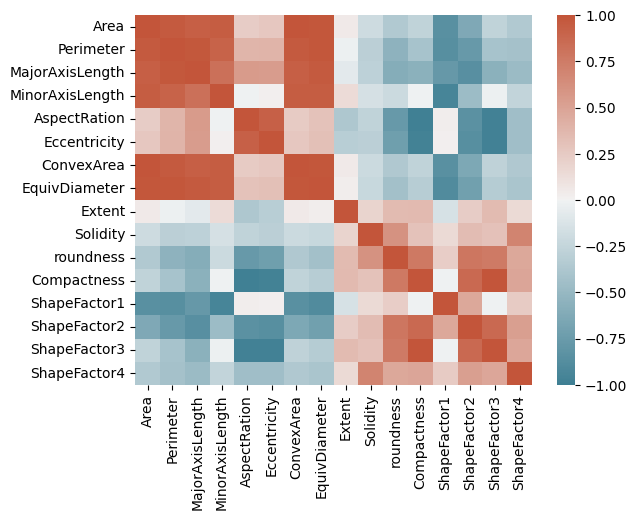

eigenvectors: 
[[ 2.82457959e-01  2.45882017e-01 -6.14466787e-02 -3.15461931e-02
  -9.13256234e-02 -3.66390029e-01  1.25044861e-01  7.17479179e-02
   3.50665669e-02 -3.90419516e-01 -1.77686475e-01  5.44842282e-02
   4.62948861e-02  6.55727948e-01  2.31435926e-01  1.33190281e-01]
 [ 3.10891123e-01  1.79302922e-01 -1.88525952e-02 -4.24678975e-02
   8.18198663e-02 -1.02508210e-02  8.15296990e-02  3.17295058e-02
  -1.57501171e-01  3.44383066e-01  1.99453621e-01 -7.50549982e-01
   3.17920275e-01  8.13901113e-02  1.46143834e-02  1.26584691e-02]
 [ 3.25823976e-01  1.00756516e-01 -8.46919067e-02 -6.79308126e-03
  -4.42163116e-02 -1.49091929e-02  1.18162546e-01 -2.00947006e-01
  -3.52366452e-01  1.01996482e-01  1.73639683e-01  2.73549959e-02
  -6.85301970e-01 -1.86251185e-01  3.46019418e-01  1.74431583e-01]
 [ 2.36199383e-01  3.43460651e-01  7.50039030e-03 -6.12997105e-02
  -4.29258549e-03 -2.78820146e-02 -6.23528140e-02  9.47252766e-02
   4.14230636e-01  4.81150315e-01  4.73720993e-03  4.13935

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use the `.corr()` method on `data_matrix` to get the correlation matrix
correlation_matrix = data_matrix.corr()

## Heatmap code:
red_blue = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, cmap=red_blue)
plt.show()

# Perform eigendecomposition using `np.linalg.eig`
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

# Print out the eigenvectors and eigenvalues
print("eigenvectors: ")
print(eigenvectors)

print("eigenvalues: ")
print(eigenvalues)

### PCA Analysis: Scree Plot and Cumulative Explained Variance

Once we have the eigenvalues from PCA, it's important to assess how much variation each principal component captures. This helps in deciding how many components to retain for dimensionality reduction.

1. **Proportion of Information Explained**:
   The proportion of variance explained by each principal component is calculated by dividing each eigenvalue by the sum of all eigenvalues. This gives insight into the relative importance of each component.

2. **Scree Plot**:
   A scree plot is used to visualize the proportion of information explained by each component. It helps identify how many components are significant. The steepness of the plot indicates how much variance is captured by the first few components.

3. **Cumulative Explained Variance**:
   By calculating the cumulative sum of the explained variance proportions, we can determine how many components are needed to reach a threshold (commonly 95%) of the total variance. This gives a sense of how well the reduced set of components captures the original data's information.

By analyzing these plots, we can balance dimensionality reduction with retaining important information in the dataset.


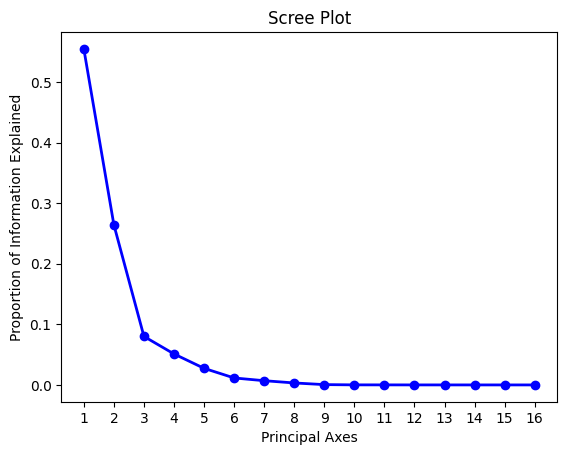

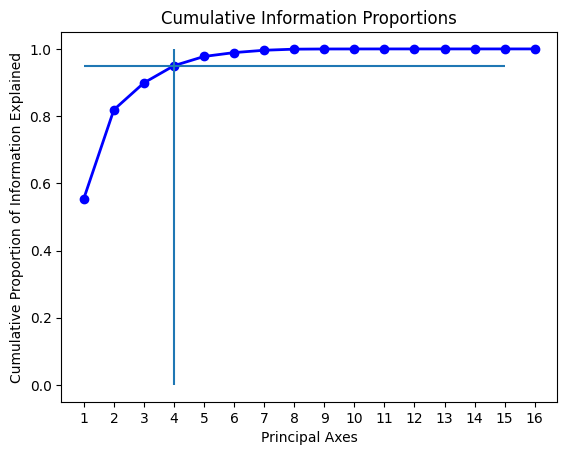

In [11]:
# Find the proportion of information for each eigenvector, which is equal to the eigenvalues divided by the sum of all eigenvalues
info_prop = eigenvalues / eigenvalues.sum()

# Plot the principal axes vs the information proportions for each principal axis

plt.plot(np.arange(1, len(info_prop) + 1), info_prop, "bo-", linewidth=2)
plt.title("Scree Plot")
plt.xlabel("Principal Axes")
plt.xticks(np.arange(1, len(info_prop) + 1))
plt.ylabel("Proportion of Information Explained")
plt.show()
plt.clf()

# Find the cumulative sum of the proportions
cum_info_prop = np.cumsum(info_prop)

## Plot the cumulative proportions array

plt.plot(np.arange(1, len(info_prop) + 1), cum_info_prop, "bo-", linewidth=2)
plt.hlines(y=0.95, xmin=1, xmax=15)
plt.vlines(x=4, ymin=0, ymax=1)
plt.title("Cumulative Information Proportions")
plt.xlabel("Principal Axes")
plt.xticks(np.arange(1, len(info_prop) + 1))
plt.ylabel("Cumulative Proportion of Information Explained")
plt.show()

### Implementing PCA using Scikit-Learn

Principal Component Analysis (PCA) can also be efficiently performed using the `scikit-learn` library, which simplifies the process with built-in functions. The process generally involves the following steps:

1. **Standardization**:
   Before applying PCA, the data needs to be standardized. This ensures that each feature has a mean of 0 and a standard deviation of 1. Standardization is crucial because PCA is sensitive to the variance of the input features.

2. **Applying PCA**:
   After standardizing, PCA is performed using the `PCA()` class in `sklearn.decomposition`. The eigenvectors (principal components) can be accessed via the `components_` attribute, and the proportion of variance explained by each principal component can be accessed through the `explained_variance_ratio_` attribute.

3. **Advantages of Scikit-Learn**:
   Using scikit-learn's implementation of PCA offers additional benefits, such as flexibility in choosing solvers and better handling of numerical stability, which can improve the accuracy and efficiency of the PCA results.

By using scikit-learn, the complexity of performing PCA is significantly reduced, while providing robust and well-tested methods for dimensionality reduction.


In [12]:
from sklearn.decomposition import PCA

# Standardize the data matrix
mean = data_matrix.mean(axis=0)
sttd = data_matrix.std(axis=0)
data_matrix_standardized = (data_matrix - mean) / sttd
print(data_matrix_standardized.head())

# Find the principal components
pca = PCA()
components = pca.fit(data_matrix_standardized).components_
components = pd.DataFrame(components).transpose()
components.index = data_matrix.columns
print(components)

# Calculate the variance/info ratios
var_ratio = pca.explained_variance_ratio_
var_ratio = pd.DataFrame(var_ratio).transpose()
print(var_ratio)

       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0 -0.840718  -1.143277        -1.306550        -0.631130     -1.564995   
1 -0.829157  -1.013887        -1.395860        -0.434429     -1.969712   
2 -0.807128  -1.078789        -1.252311        -0.585713     -1.514236   
3 -0.785712  -0.977179        -1.278778        -0.439274     -1.741554   
4 -0.781210  -1.097344        -1.380420        -0.266654     -2.117915   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0     -2.185640   -0.841420      -1.063302  0.289077  0.367600   1.423815   
1     -3.685904   -0.826071      -1.044178  0.697451 -0.462889   0.231046   
2     -2.045261   -0.808674      -1.008047  0.578174  0.518398   1.252819   
3     -2.742110   -0.773947      -0.973301  0.671235 -2.241685   0.515030   
4     -4.534862   -0.784257      -0.966044  0.476003  0.804743   1.874924   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     1.839049     

### Projecting the Data onto the Principal Axes

After performing PCA and obtaining the principal components, we can project the data onto a reduced set of principal axes. This allows us to work with fewer dimensions while retaining most of the variation present in the original data.

The projection is done by taking the dot product of the data matrix with the eigenvectors (principal components). Alternatively, scikit-learn’s `PCA` module simplifies this process by providing the `fit_transform()` method, which computes and applies the transformation to the data in one step.

Once projected, the resulting data can be visualized by plotting the first few principal components (e.g., PC1 and PC2). This visualization helps to explore patterns or clusters in a lower-dimensional space, often revealing important insights about the structure of the data, such as potential groupings or separations.


        PC1       PC2       PC3       PC4
0 -4.981378  1.824630 -0.748993 -0.390797
1 -5.436593  2.932257 -2.182294 -0.431944
2 -4.757913  1.826817 -0.514019 -0.125849
3 -4.300383  2.003587 -3.554316  0.082961
4 -6.349107  4.088055 -1.179156 -0.830327


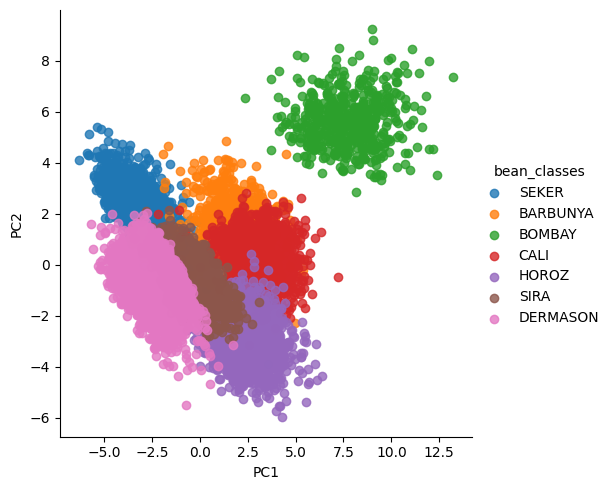

In [13]:
# Transform the data into 4 new features using the first PCs
pca = PCA(n_components=4)
data_pcomp = pca.fit_transform(data_matrix_standardized)
data_pcomp = pd.DataFrame(data_pcomp)
data_pcomp.columns = ["PC1", "PC2", "PC3", "PC4"]
print(data_pcomp.head())

# Plot the first two principal components colored by the bean classes
data_pcomp["bean_classes"] = classes
sns.lmplot(x="PC1", y="PC2", data=data_pcomp, hue="bean_classes", fit_reg=False)
plt.show()

### PCA as Features

PCA can be used not only to reduce the dimensionality of data but also to enhance model training. By selecting a subset of the principal components that capture most of the variance in the original dataset, we can train models more efficiently and with better performance.

Since the first few principal components often contain most of the information from the original features, using them can result in faster training due to the reduced dimensionality. Additionally, the principal components are uncorrelated, which can help improve model performance.

In practice, instead of using all the original features, we can train a machine learning model (such as a Support Vector Classifier) using only the top components. This approach can lead to faster training times and potentially better results, as the reduced feature set still retains most of the original information but without redundancy.


In [14]:
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

# We will use the classes as y
y = classes

# Get principal components with 4 features and save as X
pca_1 = PCA(n_components=4)
X = pca_1.fit_transform(data_matrix_standardized)

# Split the data into 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

# Create a Linear Support Vector Classifier
svc_1 = LinearSVC(random_state=0, tol=1e-5)
svc_1.fit(X_train, y_train)

# Generate a score for the testing data
score_1 = svc_1.score(X_test, y_test)
print(f"Score for model with 4 PCA features: {score_1}")

# Split the original data intro 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(
    data_matrix_standardized, y, test_size=0.33, random_state=42
)

# Create a Linear Support Vector Classifier
svc_2 = LinearSVC(random_state=0)
svc_2.fit(X_train, y_train)

# Generate a score for the testing data
score_2 = svc_2.score(X_test, y_test)
print(f"Score for model with original features: {score_2}")

Score for model with 4 PCA features: 0.8472840605520926
Score for model with original features: 0.9171861086375779


### PCA for Images I

PCA can also be applied to image datasets, where each image is represented as a row in the data matrix, and each pixel's intensity is treated as a feature. By doing this, we can visualize how PCA works to reduce dimensionality while retaining critical information.

Using an image dataset like the Olivetti Faces dataset, we start by standardizing the images. Each face image can be represented as a high-dimensional data point, with each pixel being a separate dimension.

In the next step, we'll perform PCA on the images, allowing us to re-plot the images using only a few principal components. This reduction shows how PCA captures the essential features of the images while discarding less important information, leading to dimensionality reduction while retaining the core details.


Number of features(pixels) per image: 4096
Square image side length: 64


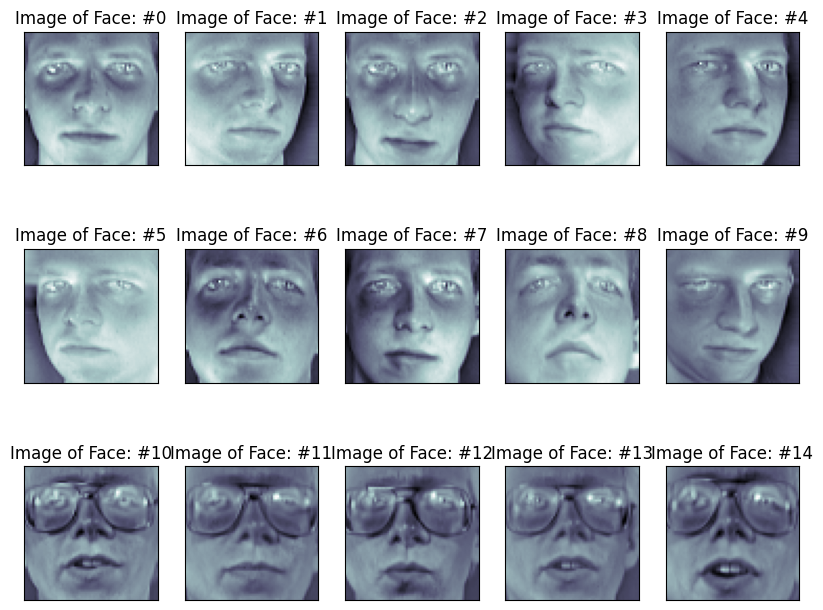

In [15]:
from sklearn import datasets

# Download the data from sklearn's datasets
faces = datasets.fetch_olivetti_faces()["data"]

# Standardize the images using the mean and standard deviation
faces_mean = faces.mean(axis=0)
faces_std = faces.std(axis=0)
faces_standardized = (faces - faces_mean) / faces_std


# Find the number of features per image
n_images, n_features = faces_standardized.shape
side_length = int(np.sqrt(n_features))
print(f"Number of features(pixels) per image: {n_features}")
print(f"Square image side length: {side_length}")


## Plot the images
# Create an empty 10x8 plot
fig = plt.figure(figsize=(10, 8))

# Observe the first 15 images.
for i in range(15):
    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f"Image of Face: #{i}")

    # Get an image from a row based on the current value of i
    face_image = faces_standardized[i]

    # Reshape this image into side_length x side_length
    face_image_reshaped = face_image.reshape(side_length, side_length)

    # Show the image
    ax.imshow(face_image_reshaped, cmap=plt.cm.bone)
plt.show()


### PCA for Images II

After cleaning the image data, PCA can be applied to extract the eigenvalues and eigenvectors. These eigenvectors, often called **eigenfaces**, represent the foundational components that form all other faces in the dataset.

By plotting the eigenfaces, we can visualize the key patterns captured by PCA. These eigenfaces serve as the building blocks of the face images, illustrating how PCA dissects complex features into simpler components.

Additionally, PCA allows us to reduce the dimensionality of the data. By transforming the original image data with a smaller set of principal components, we can reconstruct the images using only a fraction of the original features. This highlights how PCA retains most of the essential information while significantly reducing the number of features. For example, reconstructing the images using only 400 principal components (a small percentage of the original pixel data) still captures most of the image details, demonstrating the power of dimensionality reduction.


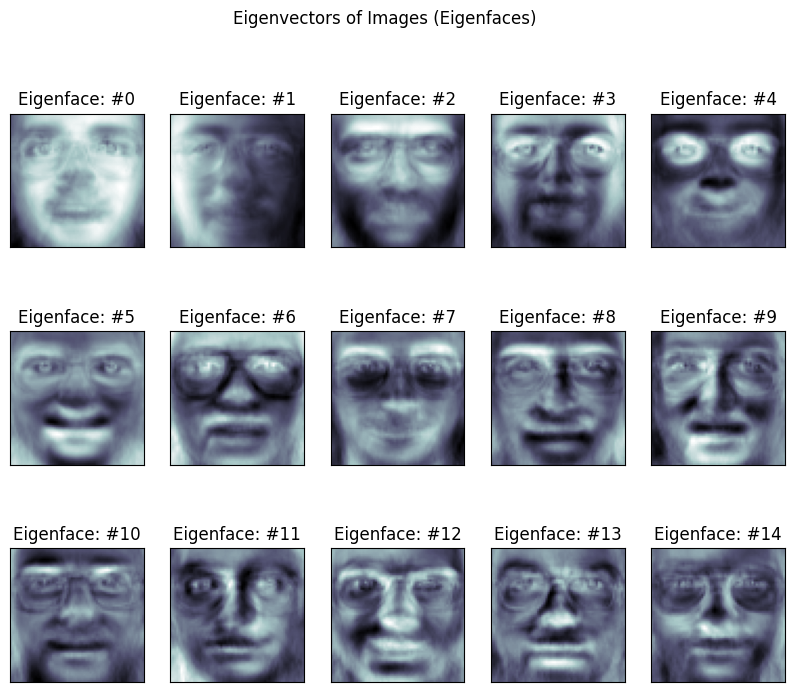

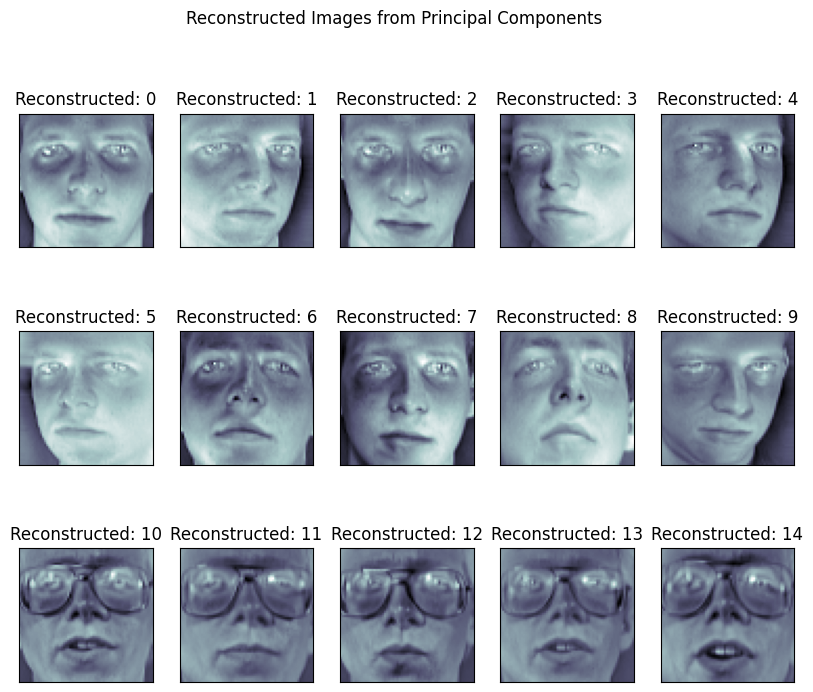

In [16]:
## Instantiate a PCA object and fit the standardized faces dataset
pca = PCA(n_components=400)
pca.fit(faces_standardized)

## Retrieve and plot eigenvectors (eigenfaces)
eigenfaces = pca.components_

fig = plt.figure(figsize=(10, 8))
fig.suptitle("Eigenvectors of Images (Eigenfaces)")
for i in range(15):
    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f"Eigenface: #{i}")

    # Get an eigenvector from the current value of i
    eigenface = eigenfaces[i]

    # Reshape this image into 64x64 since the flattened shape was 4096
    eigenface_reshaped = eigenface.reshape(64, 64)

    # Show the image
    ax.imshow(eigenface_reshaped, cmap=plt.cm.bone)
plt.show()

## Reconstruct images from the compressed principal components
# The principal components are usually calculated using `faces_standardized @ principal_axes` or the `.transform` method
principal_components = pca.transform(faces_standardized)

# The `inverse_transform` method allows for reconstruction of images in the original size
faces_reconstructed = pca.inverse_transform(principal_components)

# Plot the reconstructed images
fig = plt.figure(figsize=(10, 8))
fig.suptitle("Reconstructed Images from Principal Components")
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f"Reconstructed: {i}")

    reconstructed_face = faces_reconstructed[i]
    reconstructed_face_reshaped = reconstructed_face.reshape(64, 64)
    ax.imshow(reconstructed_face_reshaped, cmap=plt.cm.bone)
plt.show()


### Review

In these notes, we explored how PCA can be implemented using both NumPy and scikit-learn. The key takeaways include:

- **Implementation**: Scikit-learn offers advanced methods and attributes, making PCA implementation easier and more flexible. It also provides tools to display the variance explained by each principal component.
- **Dimensionality Reduction**: We visualized how data can be projected onto principal components, effectively reducing the number of features while preserving most of the information.
- **Image Classification**: By applying PCA to face images, we saw how a reduced number of principal components still captures most of the essential information.
- **Improved Speed/Accuracy**: Using principal components as input to classifiers results in faster training and can maintain or improve accuracy with lower dimensionality.
